In [53]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings(action = 'ignore')


df = pd.read_csv("credit.csv")

data = df.copy()

c = {1 :'Graduate School' , 2:'University'  , 3:'High School' , 4:'Others' , 5:'Others', 6:'Others' , 0:'Others'}
df['Education'] = df['EDUCATION'].map(c)

x = {1:1 , 2:2, 3:3 , 0:3}
df["Marriage"] = df["MARRIAGE"].map(x)

df = df.drop(columns=['EDUCATION' , 'MARRIAGE'])


df = pd.get_dummies(data = df, columns=['Marriage'], drop_first=True)

df = pd.get_dummies(data = df, columns=['SEX'], drop_first=True)

df = pd.get_dummies(data = df, columns=['Education'], drop_first=True)

### Train and test data

In [54]:
#seperating independent and dependent variables
x = df.drop(['default payment next month'], axis=1)
y = df['default payment next month']
x.shape, y.shape

from sklearn.model_selection import train_test_split
train , test = train_test_split(df,stratify=y, random_state = 56)

# cols = train_x.columns


#### Shape of Train and Testing data

In [55]:
#seperating independent and dependent variables
train_x = train.drop(['default payment next month'], axis=1)
train_y = train['default payment next month']
print(train_x.shape, train_y.shape)

#seperating independent and dependent variables
test_x = test.drop(['default payment next month'], axis=1)
test_y = test['default payment next month']
print(test_x.shape, test_y.shape)

cols = train_x.columns

(22500, 27) (22500,)
(7500, 27) (7500,)


### New Features

In [56]:
c = {1 :'Graduate School' , 2:'University'  , 3:'High School' , 4:'Others' , 5:'Others', 6:'Others' , 0:'Others'}
data['Education'] = data['EDUCATION'].map(c)

# x = {1:1 , 2:2, 3:3 , 0:3}

In [57]:
#seperating independent and dependent variables
x = data.drop(['default payment next month'], axis=1)
y = data['default payment next month']
x.shape, y.shape


from sklearn.model_selection import train_test_split
train , test = train_test_split(data,stratify=y, random_state = 56)

# cols = train_x.columns
#seperating independent and dependent variables
train_x = train.drop(['default payment next month'], axis=1)
train_y = train['default payment next month']
print(train_x.shape, train_y.shape)

#seperating independent and dependent variables
test_x = test.drop(['default payment next month'], axis=1)
test_y = test['default payment next month']
print(test_x.shape, test_y.shape)

cols = train_x.columns

(22500, 25) (22500,)
(7500, 25) (7500,)


In [58]:
def div(z,x,y):
    try:
        z = x / y
    except ZeroDivisionError:
        z = 0

### Creating New Features on train and test data seperately to avoid Leakage of data

**Binning Age Column**

In [59]:
bins = [19 , 30 , 40 , 50 , 60 , 100]
labels = ["Young" , "Adult" , "Mature" , "Old" , "Very Old"]
train["Age_Bin"] = pd.cut(train['AGE'], bins, labels = labels, include_lowest = True)

train = pd.get_dummies(data = train, columns=['Age_Bin'], drop_first=True)

In [60]:
bins = [19 , 30 , 40 , 50 , 60 , 100]
labels = ["Young" , "Adult" , "Mature" , "Old" , "Very Old"]
test["Age_Bin"] = pd.cut(test['AGE'], bins, labels = labels, include_lowest = True)

test = pd.get_dummies(data = test, columns=['Age_Bin'], drop_first=True)

**Working with credit card payment columns**
- credit card limit 
- months bill 
- months prevous payments 
- how was payment paid (on time or how much late)

In [61]:
train["Pay_Sum"] = train["PAY_0"] + train["PAY_2"] + train["PAY_3"] + train["PAY_4"] + train["PAY_5"] + train["PAY_6"]
train["Bill_Amt_Sum"] = train["BILL_AMT1"] + train["BILL_AMT2"] +train["BILL_AMT3"]+train["BILL_AMT4"]+train["BILL_AMT5"]+train["BILL_AMT6"]
train["Bill_Amt_Avg"] = train["Bill_Amt_Sum"]/6
train["Pay_Amt_Sum"] = train["PAY_AMT1"] + train["PAY_AMT2"] + train["PAY_AMT3"] + train["PAY_AMT4"] + train["PAY_AMT5"] + train["PAY_AMT6"]
train["Pay_Amt_Avg"] = train["Pay_Amt_Sum"]/6
train["Weight_Bill_Avg"] = (train["PAY_0"]*train["BILL_AMT1"] + train["PAY_2"]*train["BILL_AMT2"] + train["PAY_3"]*train["BILL_AMT3"] + train["PAY_4"]*train["BILL_AMT4"] + train["PAY_5"]*train["BILL_AMT5"] + train["PAY_6"]*train["BILL_AMT6"]) / 6
train["Weight_Pay_avg"] = (train["PAY_0"]*train["PAY_AMT1"] + train["PAY_2"]*train["PAY_AMT2"] + train["PAY_3"]*train["PAY_AMT3"] + train["PAY_4"]*train["PAY_AMT4"] + train["PAY_5"]*train["PAY_AMT5"] + train["PAY_6"]*train["PAY_AMT6"] ) / 6
train["Unweight_Bill_Avg"] = (train["Pay_Sum"]*train["Bill_Amt_Sum"])/6
train["Unweight_Pay_Avg"] = (train["Pay_Sum"]*train["Pay_Amt_Sum"])/6
train["lim_Avg"] = (train["Weight_Bill_Avg"]*6 / train["LIMIT_BAL"])*100
train["pay_over_bill"] = 0
div(train["pay_over_bill"] , train["Bill_Amt_Avg"] , train["Pay_Amt_Avg"])

In [62]:
test["Pay_Sum"] = test["PAY_0"] + test["PAY_2"] + test["PAY_3"] + test["PAY_4"] + test["PAY_5"] + test["PAY_6"]
test["Bill_Amt_Sum"] = test["BILL_AMT1"] + test["BILL_AMT2"] +test["BILL_AMT3"]+test["BILL_AMT4"]+test["BILL_AMT5"]+test["BILL_AMT6"]
test["Bill_Amt_Avg"] = test["Bill_Amt_Sum"]/6
test["Pay_Amt_Sum"] = test["PAY_AMT1"] + test["PAY_AMT2"] + test["PAY_AMT3"] + test["PAY_AMT4"] + test["PAY_AMT5"] + test["PAY_AMT6"]
test["Pay_Amt_Avg"] = test["Pay_Amt_Sum"]/6
test["Weight_Bill_Avg"] = (test["PAY_0"]*test["BILL_AMT1"] + test["PAY_2"]*test["BILL_AMT2"] + test["PAY_3"]*test["BILL_AMT3"] + test["PAY_4"]*test["BILL_AMT4"] + test["PAY_5"]*test["BILL_AMT5"] + test["PAY_6"]*test["BILL_AMT6"]) / 6
test["Weight_Pay_avg"] = (test["PAY_0"]*test["PAY_AMT1"] + test["PAY_2"]*test["PAY_AMT2"] + test["PAY_3"]*test["PAY_AMT3"] + test["PAY_4"]*test["PAY_AMT4"] + test["PAY_5"]*test["PAY_AMT5"] + test["PAY_6"]*test["PAY_AMT6"] ) / 6
test["Unweight_Bill_Avg"] = (test["Pay_Sum"]*test["Bill_Amt_Sum"])/6
test["Unweight_Pay_Avg"] = (test["Pay_Sum"]*test["Pay_Amt_Sum"])/6
test["lim_Avg"] = (test["Weight_Bill_Avg"]*6 / test["LIMIT_BAL"])*100
test["pay_over_bill"] = 0
div(test["pay_over_bill"]  , test["Bill_Amt_Avg"] , test["Pay_Amt_Avg"]) 

**New Features on basis of :**
- Relating sex and age 
- relating marriage and age
- relating Sex and marriage
- relating credit limit , bill amount and previous payment at once

In [63]:
def corr_2_cols(Col1, Col2):
    res = pd.crosstab(train[Col1],train[Col2])
    # res = df1.groupby([Col1, Col2]).size().unstack()
    res['perc'] = (res[res.columns[1]]/(res[res.columns[0]] + res[res.columns[1]]))
    return res

train['AgeBin'] = pd.cut(train['AGE'], 6, labels = [1,2,3,4,5,6])
#because 1 2 3 ecc are "categories" so far and we need numbers
train['AgeBin'] = pd.to_numeric(train['AgeBin'])
train.loc[(train['AgeBin'] == 6) , 'AgeBin'] = 5


train['SE_AG'] = 0 #creating a column in terms of sex and age
train.loc[((train.SEX == 1) & (train.AgeBin == 1)) , 'SE_AG'] = 1 #man in 20's
train.loc[((train.SEX == 1) & (train.AgeBin == 2)) , 'SE_AG'] = 2 #man in 30's
train.loc[((train.SEX == 1) & (train.AgeBin == 3)) , 'SE_AG'] = 3 #man in 40's
train.loc[((train.SEX == 1) & (train.AgeBin == 4)) , 'SE_AG'] = 4 #man in 50's
train.loc[((train.SEX == 1) & (train.AgeBin == 5)) , 'SE_AG'] = 5 #man in 60's and above
train.loc[((train.SEX == 2) & (train.AgeBin == 1)) , 'SE_AG'] = 6 #woman in 20's
train.loc[((train.SEX == 2) & (train.AgeBin == 2)) , 'SE_AG'] = 7 #woman in 30's
train.loc[((train.SEX == 2) & (train.AgeBin == 3)) , 'SE_AG'] = 8 #woman in 40's
train.loc[((train.SEX == 2) & (train.AgeBin == 4)) , 'SE_AG'] = 9 #woman in 50's
train.loc[((train.SEX == 2) & (train.AgeBin == 5)) , 'SE_AG'] = 10 #woman in 60's and above
corr_2_cols('SE_AG', 'default payment next month')

train['SE_MA'] = 0
train.loc[((train.SEX == 1) & (train.MARRIAGE == 1)) , 'SE_MA'] = 1 #married man
train.loc[((train.SEX == 1) & (train.MARRIAGE == 2)) , 'SE_MA'] = 2 #single man
train.loc[((train.SEX == 1) & (train.MARRIAGE == 3)) , 'SE_MA'] = 3 #divorced man
train.loc[((train.SEX == 2) & (train.MARRIAGE == 1)) , 'SE_MA'] = 4 #married woman
train.loc[((train.SEX == 2) & (train.MARRIAGE == 2)) , 'SE_MA'] = 5 #single woman
train.loc[((train.SEX == 2) & (train.MARRIAGE == 3)) , 'SE_MA'] = 6 #divorced woman
corr_2_cols('SE_MA', 'default payment next month')

## calculating Average expense from bill amount of previous and this month and the pay amount , dividing by limit balance

train['Avg_exp_5'] = ((train['BILL_AMT5'] - (train['BILL_AMT6'] - train['PAY_AMT5']))) / train['LIMIT_BAL']
train['Avg_exp_4'] = (((train['BILL_AMT5'] - (train['BILL_AMT6'] - train['PAY_AMT5'])) +
                 (train['BILL_AMT4'] - (train['BILL_AMT5'] - train['PAY_AMT4']))) / 2) / train['LIMIT_BAL']
train['Avg_exp_3'] = (((train['BILL_AMT5'] - (train['BILL_AMT6'] - train['PAY_AMT5'])) +
                 (train['BILL_AMT4'] - (train['BILL_AMT5'] - train['PAY_AMT4'])) +
                 (train['BILL_AMT3'] - (train['BILL_AMT4'] - train['PAY_AMT3']))) / 3) / train['LIMIT_BAL']
train['Avg_exp_2'] = (((train['BILL_AMT5'] - (train['BILL_AMT6'] - train['PAY_AMT5'])) +
                 (train['BILL_AMT4'] - (train['BILL_AMT5'] - train['PAY_AMT4'])) +
                 (train['BILL_AMT3'] - (train['BILL_AMT4'] - train['PAY_AMT3'])) +
                 (train['BILL_AMT2'] - (train['BILL_AMT3'] - train['PAY_AMT2']))) / 4) / train['LIMIT_BAL']
train['Avg_exp_1'] = (((train['BILL_AMT5'] - (train['BILL_AMT6'] - train['PAY_AMT5'])) +
                 (train['BILL_AMT4'] - (train['BILL_AMT5'] - train['PAY_AMT4'])) +
                 (train['BILL_AMT3'] - (train['BILL_AMT4'] - train['PAY_AMT3'])) +
                 (train['BILL_AMT2'] - (train['BILL_AMT3'] - train['PAY_AMT2'])) +
                 (train['BILL_AMT1'] - (train['BILL_AMT2'] - train['PAY_AMT1']))) / 5) / train['LIMIT_BAL']


In [64]:
def corr_2_cols(Col1, Col2):
    res = pd.crosstab(test[Col1],test[Col2])
    # res = df1.groupby([Col1, Col2]).size().unstack()
    res['perc'] = (res[res.columns[1]]/(res[res.columns[0]] + res[res.columns[1]]))
    return res

test['AgeBin'] = pd.cut(test['AGE'], 6, labels = [1,2,3,4,5,6])
#because 1 2 3 ecc are "categories" so far and we need numbers
test['AgeBin'] = pd.to_numeric(test['AgeBin'])
test.loc[(test['AgeBin'] == 6) , 'AgeBin'] = 5


test['SE_AG'] = 0 #creating a column in terms of sex and age
test.loc[((test.SEX == 1) & (test.AgeBin == 1)) , 'SE_AG'] = 1 #man in 20's
test.loc[((test.SEX == 1) & (test.AgeBin == 2)) , 'SE_AG'] = 2 #man in 30's
test.loc[((test.SEX == 1) & (test.AgeBin == 3)) , 'SE_AG'] = 3 #man in 40's
test.loc[((test.SEX == 1) & (test.AgeBin == 4)) , 'SE_AG'] = 4 #man in 50's
test.loc[((test.SEX == 1) & (test.AgeBin == 5)) , 'SE_AG'] = 5 #man in 60's and above
test.loc[((test.SEX == 2) & (test.AgeBin == 1)) , 'SE_AG'] = 6 #woman in 20's
test.loc[((test.SEX == 2) & (test.AgeBin == 2)) , 'SE_AG'] = 7 #woman in 30's
test.loc[((test.SEX == 2) & (test.AgeBin == 3)) , 'SE_AG'] = 8 #woman in 40's
test.loc[((test.SEX == 2) & (test.AgeBin == 4)) , 'SE_AG'] = 9 #woman in 50's
test.loc[((test.SEX == 2) & (test.AgeBin == 5)) , 'SE_AG'] = 10 #woman in 60's and above
corr_2_cols('SE_AG', 'default payment next month')

test['SE_MA'] = 0
test.loc[((test.SEX == 1) & (test.MARRIAGE == 1)) , 'SE_MA'] = 1 #married man
test.loc[((test.SEX == 1) & (test.MARRIAGE == 2)) , 'SE_MA'] = 2 #single man
test.loc[((test.SEX == 1) & (test.MARRIAGE == 3)) , 'SE_MA'] = 3 #divorced man
test.loc[((test.SEX == 2) & (test.MARRIAGE == 1)) , 'SE_MA'] = 4 #married woman
test.loc[((test.SEX == 2) & (test.MARRIAGE == 2)) , 'SE_MA'] = 5 #single woman
test.loc[((test.SEX == 2) & (test.MARRIAGE == 3)) , 'SE_MA'] = 6 #divorced woman
corr_2_cols('SE_MA', 'default payment next month')

## calculating Average expense from bill amount of previous and this month and the pay amount , dividing by limit balance

test['Avg_exp_5'] = ((test['BILL_AMT5'] - (test['BILL_AMT6'] - test['PAY_AMT5']))) / test['LIMIT_BAL']
test['Avg_exp_4'] = (((test['BILL_AMT5'] - (test['BILL_AMT6'] - test['PAY_AMT5'])) +
                 (test['BILL_AMT4'] - (test['BILL_AMT5'] - test['PAY_AMT4']))) / 2) / test['LIMIT_BAL']
test['Avg_exp_3'] = (((test['BILL_AMT5'] - (test['BILL_AMT6'] - test['PAY_AMT5'])) +
                 (test['BILL_AMT4'] - (test['BILL_AMT5'] - test['PAY_AMT4'])) +
                 (test['BILL_AMT3'] - (test['BILL_AMT4'] - test['PAY_AMT3']))) / 3) / test['LIMIT_BAL']
test['Avg_exp_2'] = (((test['BILL_AMT5'] - (test['BILL_AMT6'] - test['PAY_AMT5'])) +
                 (test['BILL_AMT4'] - (test['BILL_AMT5'] - test['PAY_AMT4'])) +
                 (test['BILL_AMT3'] - (test['BILL_AMT4'] - test['PAY_AMT3'])) +
                 (test['BILL_AMT2'] - (test['BILL_AMT3'] - test['PAY_AMT2']))) / 4) / test['LIMIT_BAL']
test['Avg_exp_1'] = (((test['BILL_AMT5'] - (test['BILL_AMT6'] - test['PAY_AMT5'])) +
                 (test['BILL_AMT4'] - (test['BILL_AMT5'] - test['PAY_AMT4'])) +
                 (test['BILL_AMT3'] - (test['BILL_AMT4'] - test['PAY_AMT3'])) +
                 (test['BILL_AMT2'] - (test['BILL_AMT3'] - test['PAY_AMT2'])) +
                 (test['BILL_AMT1'] - (test['BILL_AMT2'] - test['PAY_AMT1']))) / 5) / test['LIMIT_BAL']


### Total Features : 57

- Making dummies of necessary features
- Splitting data as train_x and train_y and same for test

In [65]:
train = pd.get_dummies(data = train, columns=['SEX'], drop_first=True)

In [66]:
train = pd.get_dummies(data = train, columns=['EDUCATION'], drop_first=True)
train = pd.get_dummies(data = train, columns=['Education'], drop_first=True)
train = pd.get_dummies(data = train, columns=['MARRIAGE'], drop_first=True)

In [67]:
test = pd.get_dummies(data = test, columns=['SEX'], drop_first=True)
test = pd.get_dummies(data = test, columns=['EDUCATION'], drop_first=True)
test = pd.get_dummies(data = test, columns=['Education'], drop_first=True)
test = pd.get_dummies(data = test, columns=['MARRIAGE'], drop_first=True)

In [68]:
#seperating independent and dependent variables
train_x = train.drop(['default payment next month'], axis=1)
train_y = train['default payment next month']
print(train_x.shape, train_y.shape)

#seperating independent and dependent variables
test_x = test.drop(['default payment next month'], axis=1)
test_y = test['default payment next month']
print(test_x.shape, test_y.shape)

cols2 = train_x.columns

(22500, 57) (22500,)
(7500, 57) (7500,)


In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
x_train ,x_val, y_train ,y_val  = train_test_split(train_x, train_y, random_state = 96, stratify=train_y)
col=x_train.columns

print(x_train.shape , y_train.shape , x_val.shape , y_val.shape)

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

(16875, 57) (16875,) (5625, 57) (5625,)


### Bagging

In [37]:
from sklearn.ensemble import BaggingClassifier as BC
from sklearn.metrics import f1_score

In [38]:
bc = BC()
bc

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [39]:
bc = BC()
bc.fit(train_x, train_y)
train_predict = bc.predict(train_x)
score1 = f1_score(train_predict, train_y)
score1

0.9561861047360735

In [40]:
test_predict = bc.predict(test_x)
score2 = f1_score(test_predict, test_y)
score2

0.424003158310304

In [41]:
percentage = [(i/100) for i in range(1,10)]

def max_sample(data):
    
    multiplied_list = [element * data.shape[0] for element in percentage]
    split_list = [math.floor(integer) for integer in multiplied_list]
    return(split_list)

In [42]:
max_sample(x_train)

[168, 337, 506, 675, 843, 1012, 1181, 1350, 1518]

In [44]:
train_accuracy = []
validation_accuracy = []
for sample in max_sample(x_train):
    bc1 = BC(max_samples = sample, random_state=10)
    bc1.fit(x_train, y_train)
    pred_train = bc1.predict(x_train)
    pred_val = bc1.predict(x_val)
    train_accuracy.append(f1_score(pred_train , y_train))
    validation_accuracy.append(f1_score(pred_val , y_val))

In [45]:
frame = pd.DataFrame({'percentage of data' : range(1,10) , 'max_sample':max_sample(x_train), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame

,percentage of data,max_sample,train_acc,valid_acc
0,1,168,0.436508,0.449001
1,2,337,0.466375,0.473892
2,3,506,0.471077,0.439220
3,4,675,0.455321,0.463710
4,5,843,0.480965,0.462312
5,6,1012,0.477996,0.450675
6,7,1181,0.492245,0.461926
7,8,1350,0.498271,0.453944
8,9,1518,0.493094,0.458781


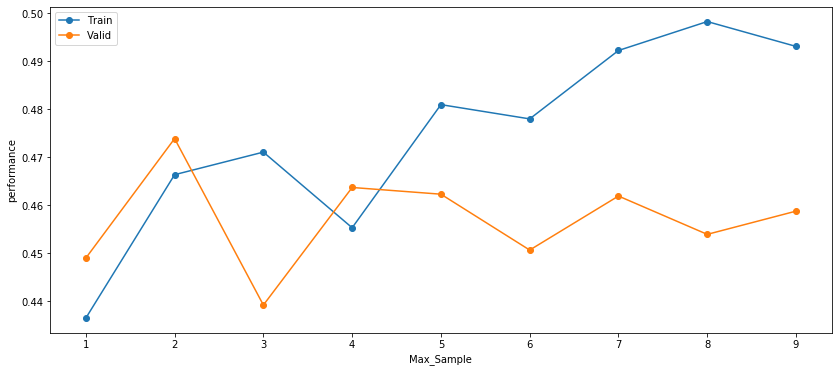

In [47]:
plt.figure(figsize=(14,6))
plt.plot(frame['percentage of data'], frame['train_acc'], marker='o')
plt.plot(frame['percentage of data'], frame['valid_acc'], marker='o')
plt.xlabel('Max_Sample')
plt.ylabel('performance')
plt.legend(["Train" , "Valid"])

5 %  = 843 and 7 % = 1181 data is good for sample to be taken when replacing

In [72]:
col.shape

(57,)

### Max_Feature tuning

In [77]:
train_accuracy = []
validation_accuracy = []
for feature in range(1,30):
    bc1 = BC(max_samples = 1181 , max_features = feature, random_state=10)
    bc1.fit(x_train, y_train)
    pred_train = bc1.predict(x_train)
    pred_val = bc1.predict(x_val)
    train_accuracy.append(f1_score(pred_train , y_train))
    validation_accuracy.append(f1_score(pred_val , y_val))

In [78]:
frame = pd.DataFrame({'max_features':range(1,30), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame

,max_features,train_acc,valid_acc
0,1,0.088710,0.065201
1,2,0.256689,0.192435
2,3,0.334015,0.282742
3,4,0.339956,0.255025
4,5,0.340792,0.265090
5,6,0.387386,0.335461
6,7,0.401454,0.349481
7,8,0.440825,0.394200
8,9,0.443648,0.397429
9,10,0.454902,0.392665


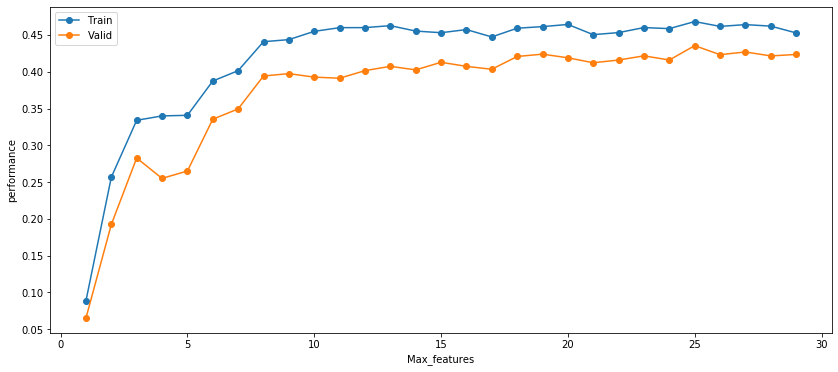

In [79]:
plt.figure(figsize=(14,6))
plt.plot(frame['max_features'], frame['train_acc'], marker='o')
plt.plot(frame['max_features'], frame['valid_acc'], marker='o')
plt.xlabel('Max_features')
plt.ylabel('performance')
plt.legend(["Train" , "Valid"])

In [80]:
train_accuracy = []
validation_accuracy = []
for feature in range(1,30):
    bc1 = BC(max_samples = 1181 , bootstrap_features = True , max_features = feature, random_state=10)
    bc1.fit(x_train, y_train)
    pred_train = bc1.predict(x_train)
    pred_val = bc1.predict(x_val)
    train_accuracy.append(f1_score(pred_train , y_train))
    validation_accuracy.append(f1_score(pred_val , y_val))

frame = pd.DataFrame({'max_features':range(1,30), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame

,max_features,train_acc,valid_acc
0,1,0.017300,0.012608
1,2,0.148977,0.095930
2,3,0.248723,0.166554
3,4,0.261475,0.177601
4,5,0.305803,0.233987
5,6,0.337646,0.278899
6,7,0.342623,0.263390
7,8,0.345834,0.281095
8,9,0.355289,0.290598
9,10,0.364905,0.311515


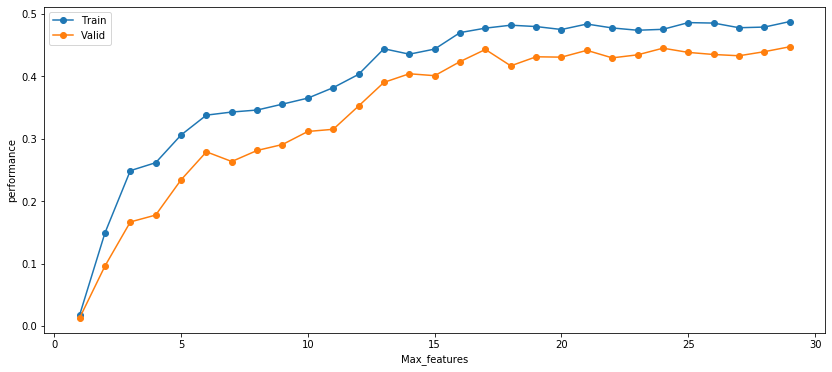

In [81]:
plt.figure(figsize=(14,6))
plt.plot(frame['max_features'], frame['train_acc'], marker='o')
plt.plot(frame['max_features'], frame['valid_acc'], marker='o')
plt.xlabel('Max_features')
plt.ylabel('performance')
plt.legend(["Train" , "Valid"])

#### At 17 max_features with boot_starp = True is best

In [83]:
bc1 = BC(max_samples = 1181 , bootstrap_features = True , max_features = 17, random_state=10)

#fitting the model
bc1.fit(x_train, y_train)
pred_train = bc1.predict(x_train)
pred_val = bc1.predict(x_val)

from sklearn.metrics import f1_score
score1 = f1_score(pred_train, y_train)
score2 = f1_score(pred_val, y_val)
score1 , score2

(0.4770034843205575, 0.4428571428571429)

In [84]:
### Changing Base_estimator

In [87]:
from sklearn.tree import DecisionTreeClassifier

In [88]:
dt = DecisionTreeClassifier(class_weight="balanced",min_samples_leaf = 337 , min_samples_split = 506 , max_depth = 6 , random_state=10)

In [90]:
bc1 = BC(base_estimator = dt , random_state=10)

#fitting the model
bc1.fit(x_train, y_train)
pred_train = bc1.predict(x_train)
pred_val = bc1.predict(x_val)

from sklearn.metrics import f1_score
score1 = f1_score(pred_train, y_train)
score2 = f1_score(pred_val, y_val)
score1 , score2

(0.5374469036440868, 0.5382323733862959)

In [91]:
percentage = [(i/100) for i in range(1,10)]

def max_sample(data):
    
    multiplied_list = [element * data.shape[0] for element in percentage]
    split_list = [math.floor(integer) for integer in multiplied_list]
    return(split_list)

In [92]:
max_sample(x_train)

[168, 337, 506, 675, 843, 1012, 1181, 1350, 1518]

In [93]:
train_accuracy = []
validation_accuracy = []
for sample in max_sample(x_train):
    bc1 = BC(base_estimator = dt , max_samples = sample, random_state=10)
    bc1.fit(x_train, y_train)
    pred_train = bc1.predict(x_train)
    pred_val = bc1.predict(x_val)
    train_accuracy.append(f1_score(pred_train , y_train))
    validation_accuracy.append(f1_score(pred_val , y_val))

In [94]:
frame = pd.DataFrame({'percentage of data' : range(1,10) , 'max_sample':max_sample(x_train), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame

,percentage of data,max_sample,train_acc,valid_acc
0,1,168,0.362286,0.362207
1,2,337,0.362286,0.362207
2,3,506,0.362286,0.362207
3,4,675,0.362286,0.362207
4,5,843,0.400674,0.406523
5,6,1012,0.405828,0.400163
6,7,1181,0.429207,0.427232
7,8,1350,0.512933,0.522578
8,9,1518,0.519765,0.529551


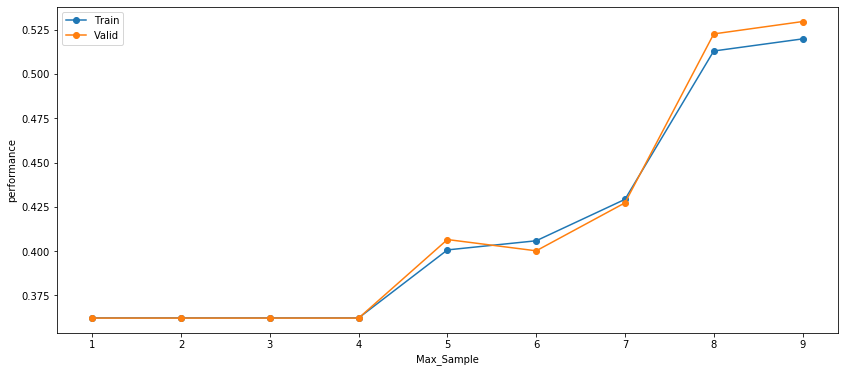

In [95]:
plt.figure(figsize=(14,6))
plt.plot(frame['percentage of data'], frame['train_acc'], marker='o')
plt.plot(frame['percentage of data'], frame['valid_acc'], marker='o')
plt.xlabel('Max_Sample')
plt.ylabel('performance')
plt.legend(["Train" , "Valid"])

In [96]:
percentage = [(i/100) for i in range(1,20)]

def max_sample(data):
    
    multiplied_list = [element * data.shape[0] for element in percentage]
    split_list = [math.floor(integer) for integer in multiplied_list]
    return(split_list)

In [98]:
train_accuracy = []
validation_accuracy = []
for sample in max_sample(x_train):
    bc1 = BC(base_estimator = dt , max_samples = sample, random_state=10)
    bc1.fit(x_train, y_train)
    pred_train = bc1.predict(x_train)
    pred_val = bc1.predict(x_val)
    train_accuracy.append(f1_score(pred_train , y_train))
    validation_accuracy.append(f1_score(pred_val , y_val))

In [99]:
frame = pd.DataFrame({'percentage of data' : range(1,20) , 'max_sample':max_sample(x_train), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame

,percentage of data,max_sample,train_acc,valid_acc
0,1,168,0.362286,0.362207
1,2,337,0.362286,0.362207
2,3,506,0.362286,0.362207
3,4,675,0.362286,0.362207
4,5,843,0.400674,0.406523
5,6,1012,0.405828,0.400163
6,7,1181,0.429207,0.427232
7,8,1350,0.512933,0.522578
8,9,1518,0.519765,0.529551
9,10,1687,0.513998,0.530612


### Max_Feature tuning

In [100]:
train_accuracy = []
validation_accuracy = []
for feature in range(1,30):
    bc1 = BC(max_features = feature, random_state=10)
    bc1.fit(x_train, y_train)
    pred_train = bc1.predict(x_train)
    pred_val = bc1.predict(x_val)
    train_accuracy.append(f1_score(pred_train , y_train))
    validation_accuracy.append(f1_score(pred_val , y_val))

In [101]:
frame = pd.DataFrame({'max_features':range(1,30), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame

,max_features,train_acc,valid_acc
0,1,0.551791,0.034215
1,2,0.808964,0.168421
2,3,0.836886,0.278239
3,4,0.899912,0.305022
4,5,0.929907,0.261307
5,6,0.939145,0.327791
6,7,0.940379,0.331770
7,8,0.939796,0.384404
8,9,0.939779,0.413348
9,10,0.937915,0.415598


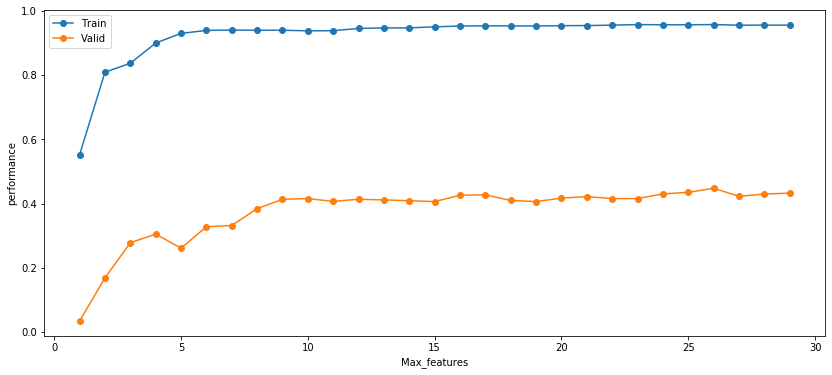

In [102]:
plt.figure(figsize=(14,6))
plt.plot(frame['max_features'], frame['train_acc'], marker='o')
plt.plot(frame['max_features'], frame['valid_acc'], marker='o')
plt.xlabel('Max_features')
plt.ylabel('performance')
plt.legend(["Train" , "Valid"])

In [103]:
train_accuracy = []
validation_accuracy = []
for feature in range(1,30):
    bc1 = BC(bootstrap_features = True , max_features = feature, random_state=10)
    bc1.fit(x_train, y_train)
    pred_train = bc1.predict(x_train)
    pred_val = bc1.predict(x_val)
    train_accuracy.append(f1_score(pred_train , y_train))
    validation_accuracy.append(f1_score(pred_val , y_val))

frame = pd.DataFrame({'max_features':range(1,30), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame

,max_features,train_acc,valid_acc
0,1,0.541016,0.020313
1,2,0.833490,0.087085
2,3,0.911289,0.178231
3,4,0.921235,0.181941
4,5,0.932133,0.192513
5,6,0.941127,0.245725
6,7,0.940544,0.265752
7,8,0.942123,0.288355
8,9,0.946569,0.328428
9,10,0.948300,0.337830


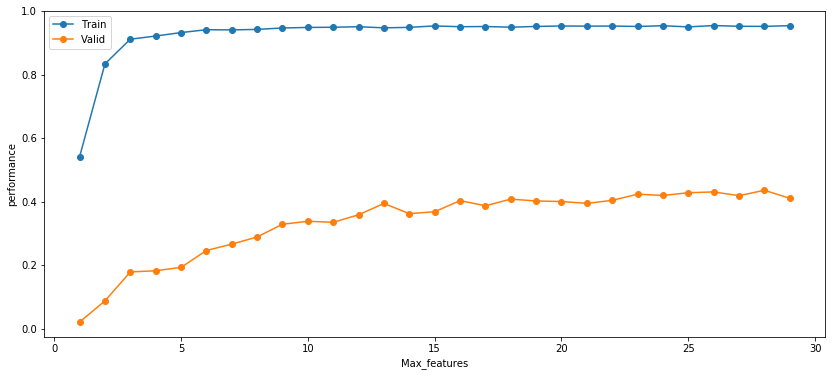

In [104]:
plt.figure(figsize=(14,6))
plt.plot(frame['max_features'], frame['train_acc'], marker='o')
plt.plot(frame['max_features'], frame['valid_acc'], marker='o')
plt.xlabel('Max_features')
plt.ylabel('performance')
plt.legend(["Train" , "Valid"])

#### At 17 max_features with boot_starp = True is best

In [105]:
from sklearn.linear_model import LogisticRegression 

In [106]:
LR = LogisticRegression(penalty='l1' , class_weight='balanced', solver='liblinear')

In [107]:
bc1 = BC(base_estimator = LR , random_state=10)

#fitting the model
bc1.fit(x_train, y_train)
pred_train = bc1.predict(x_train)
pred_val = bc1.predict(x_val)

from sklearn.metrics import f1_score
score1 = f1_score(pred_train, y_train)
score2 = f1_score(pred_val, y_val)
score1 , score2

(0.5047290530766663, 0.5159382188629642)